# Tugas 5 Desain dan Analasisi Algoritma

**Nama :** Azisya Luthfi Bintang
**NIM :** 2022071051

---

**Inversi dalam satu array**

Menghitung berapa banyak perubahan yang harus dilakukan untuk mengubah array menjadi bentuk yang urut, ketika array sudah diurutkan berarti memerlukan 0 inversi.

In [10]:
def countInversion(arr):
  result = 0
  for i in range(len(arr)):
    for j in range(i+1, len(arr)):
      if arr[i]>arr[j]:
        result += 1
        # arr[i], arr[j] = arr[j], arr[i]
  return result

arr = [21, 70, 36, 14, 25]

result = countInversion(arr)
print(result)


6


---

Kali ini menghitung dengan menggunakan divide and conquer

In [16]:
def countInversion(arr):
  icount = 0
  if len(arr)<= 1:
    return icount

  mid = len(arr)//2
  left=arr[:mid]
  right=arr[mid:]
  icount += countInversion(left)
  icount += countInversion(right)
  i=j=k=0

  while i<len(left) and j<len(right):
    if left[i]<right[j]:
      arr[k]=left[i]
      i+=1
    else:
      arr[k] = right[j]
      j+=1
      icount+=(mid-i)
    k+=1
  while i<len(left):
    arr[k]=left[i]
    i+=1
    k+1
  while j<len(right):
    arr[k] = right[j]
    j+=1
    k+=1

  return icount

arr=[1, 20, 6, 4, 5]
result = countInversion(arr)
print(result)

5


---

**Summation**

Menghitung total jumlah dari nbuah bilangan.
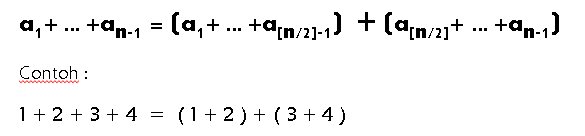

In [17]:
arr = [3,7,5,2,1,8,9]
total = 0
for i in range(len(arr)):
  total += arr[i];

print(total)

35


---

**MinMaks**

Menentukan nilai maksimum dan minimum dengan metode divide and conquer

In [22]:
def divideAndConquer_Max(arr, ind, len):
  maximum = -1

  if (ind >= len - 2):
    if(arr[ind] > arr[ind + 1]):
      return arr[ind]
    else:
      return arr[ind+1]

  maximum = divideAndConquer_Max(arr, ind+1, len)

  if(arr[ind] > maximum):
    return arr[ind]
  else:
    return maximum;

def divideAndConquer_Min(arr, ind, len):
  minimum =  0;
  if(ind >= len-2):
    if(arr[ind] < arr[ind+1]):
      return arr[ind]
    else:
      return arr[ind+1]

  minimum = divideAndConquer_Min(arr, ind + 1, len)

  if(arr[ind] < minimum):
    return arr[ind]
  else:
    return minimum

if __name__ == '__main__':
  minimum, maximum = 0, -1

  arr = [4,12,23,9,21,1,35,2,24]

  maximum = divideAndConquer_Max(arr, 0, len(arr))
  minimum = divideAndConquer_Min(arr, 0, len(arr))

  print("The minimum number in the array is :", minimum)
  print("the maximum number in the array is :", maximum)

The minimum number in the array is : 1
the maximum number in the array is : 35


---
**Merge Sort**


In [24]:
from IPython.core import prefilter
def mergeSort(arr):
  if len(arr)>1:
    r = len(arr)//2
    l = arr[:r]
    m = arr[r:]

    mergeSort(l)
    mergeSort(m)

    i=j=k=0

    while i < len(l) and j < len(m):
      if l[i] < m[j]:
        arr[k] = l[i]
        i+=1
      else:
        arr[k] = m[j]
        j+=1
      k+=1

    while i<len(l):
      arr[k] = l[i]
      i+= 1
      k+= 1

    while j<len(m):
      arr[k] = m[j]
      j+= 1
      k+= 1

def printList(arr):
  for i in range(len(arr)):
    print(arr[i], end=" ")
  print()

if __name__ == '__main__':
  arr = [4,12,23,9,21,1,35,2,24]

  mergeSort(arr)
  print("Sorted array is : ")
  printList(arr)

Sorted array is : 
1 2 4 9 12 21 23 24 35 


---
**QuickSort**

In [33]:
def partition(arr, low, high):
  pivot = arr[high]
  i = low - 1

  for j in range(low, high):
    if(arr[j] <= pivot):
      i+=1
      (arr[i], arr[j]) = (arr[j], arr[i])

  (arr[i+1], arr[high]) = (arr[high], arr[i+1])
  return i+1

def quickSort(arr, low, high):
  if low < high:
    pi = partition(arr, low, high)

    quickSort(arr, low, pi-1)

    quickSort(arr, pi+1, high)

data = [4,12,23,9,21,1,35,2,24]
print("Unsorted Array :", data)

size = len(data)-1
quickSort(data, 0, size)
print("Sorted Array in Ascending Order :", data)

Unsorted Array : [4, 12, 23, 9, 21, 1, 35, 2, 24]
Sorted Array in Ascending Order : [1, 2, 4, 9, 12, 21, 23, 24, 35]


---
**Mencari Subarray Sum**

Mencari hasil penjumlahan terbesar dari suatu array yang isinya nilai negatif dan positif/ Misal suatu array isinya {-2, -5, 6, -2, -3, 1, 5, -6}, maka penjumlahan terbesarnnya disusun dari {6, -2, -3, 1, 5} = 7

In [35]:
def maxSubSum(arr):
  max_so_far=0
  max_ending_here=0
  for i in range(len(arr)):
    max_ending_here += arr[i]
    if max_ending_here>max_so_far:
      max_so_far=max_ending_here
    if max_ending_here<0:
      max_ending_here=0
  return max_so_far

arr = [-2, -5, 6, -2, -3, 1, 5, -6]
result = maxSubSum(arr)
print(result)

7


---

Menggunakan divide and Conquer

In [36]:
def maxCrossingSum(arr, low, mid, high):
  result = 0; leftSum=float('-infinity')
  for i in range(mid, low-1, -1):
    result += arr[i]
    if result > leftSum:
      leftSum=result
  result=0; rightSum=float('-infinity')
  for i in range(mid+1, high+1):
    result += arr[i]
    if result >rightSum:
      rightSum=result
  return leftSum+rightSum

def maxSum(arr, low, high):
  if low==high:
    return arr[low]
  mid = (low+high)//2
  return max(maxSum(arr,low,mid), maxSum(arr,mid+1, high), maxCrossingSum(arr, low,mid,high))

arr = [-2, -5, 6, -2, -3, 1, 5, -6]
result = maxSubSum(arr)
print(result)

7


---
**Longest Common Prefix**

Mencari potongan suku kata(prefix) yang sama dan terpanjang

In [40]:
def longestCommonPrefix(a):
  size = len(a)

  if(size == 0):
    return ""

  if(size == 1):
    return a[0]

  a.sort()
  end = min(len(a[0]), len(a[size-1]))

  i=0
  while (i < end and
         a[0][i] == a[size-1][i]):
    i+=1
  pre = a[0][0: i]
  return pre

arr=["geeksforgeeks", "geeks", "geek", "geezer"]
result = longestCommonPrefix(arr)
print(result)

arr =["apple", "ape", "april"]
result = longestCommonPrefix(arr)
print(result)

gee
ap


---

**Median dua array urut sama ukuran**

Mencari nilai tengah dari dua array yang berurutan nilainya, dan ukurannya sama.

In [41]:
def medianOfArray(arr1, arr2, n):
  m1 =-1
  m2 =-1
  count=0
  i=j=0
  while count<n+1:
    count+=1
    if i==n:
      m1=m2
      m2=arr2[0]
    if j==n:
      m1=m2
      m2=arr1[0]
    if arr1[i]<arr2[j]:
      m1=m2
      m2=arr1[i]
      i+=1
    else:
      m1=m2
      m2=arr2[j]
      j+=1
  return (m1+m2)//2

arr1 = [1,12,15,26,38]
arr2 = [2,13,17,30,45]
print(medianOfArray(arr1,arr2,len(arr1)))

16


---

**Median dua array urut beda ukuran**

Mencari nilai tengah array yang berurutan namun ukurannya berbeda

In [42]:
def Solution(arr):
  n = len(arr)
  if n%2 == 0:
    z = n//2
    e = arr[z]
    q = arr[z-1]
    ans = (e+q)/2
    return ans
  else:
    z = n//2
    ans = arr[z]
    return ans

arr1 = [-5,3,6,12,15]
arr2 = [-12,-10,-6,-3,4,10]

arr3 = arr1 + arr2

arr3.sort()
print("Median =", Solution(arr3))

Median = 3


---
Mencari elemen terbesar dari array dan lebih kecil dari angka

In [44]:
def floorSorted(arr, low, high, x):
  if low>high:
    return -1
  if arr[low]>x:
    return -1
  if arr[high]<=x:
    return arr[high]

  mid =(low+high)//2

  if arr[mid]==x:
    return arr[mid]
  if mid>0 and x >=arr[mid-1] and arr[mid]>x:
    return arr[mid-1]
  if mid<high and x<arr[mid+1] and x>=arr[mid]:
    return arr[mid]
  if x>arr[mid]:
    return floorSorted(arr,mid+1, high, x)
  else:
    return floorSorted(arr,low,mid-1,x)

arr = [1,2,8,10,12,14,19]
x = 5
print(floorSorted(arr,0,len(arr)-1, x))

2


---
**Nilai terdekat**

Mencari nilai terdekat suatu angka dalam suatu array

- menggunakan metode divide and conquer

In [45]:
def closestNumber(arr, low, high, x):
  if low>high:
    return -1
  if arr[high] <= x:
    return arr[high]
  if arr[low] >=x:
    return arr[low]

  mid = (low+high)//2

  if arr[mid]==x:
    return arr[mid]
  abs_mid=abs(arr[mid-1]-x)

  if mid>0:
    abs_left=abs(arr[mid-1]-x)
    if abs_left<abs_mid:
      return closestNumber(arr, low, mid-1, x)
    if mid<high:
      abs_right=abs(arr[mid+1]-x)
      if abs_right<abs_mid:
        return closestNumber(arr, mid+1, high, x)
  return arr[mid]

arr = [2,5,6,7,8,9]
x = 9
print(closestNumber(arr, 0, len(arr)-1, x))

9


- Menggunakan metode biasa

In [48]:
def find_closest(arr, k):
  arr.sort()
  closest_num = arr[0]
  for num in arr:
    if abs(num-k) < abs(closest_num - k):
      closest_num = num
    if num > k:
      break
  return closest_num

arr = [3.64, 5.2, 9.42, 9.35, 8.5, 8]
k = 9.1
print(find_closest(arr, k))

arr = [2, 5, 5, 7, 8, 8, 9]
k = 6
print(find_closest(arr, k))

9.35
5


---
**Fixed Point**

Mencari nilai fixed point, yaitu suatu bilangan dalam yang nilainya sama dengan urutannya dalam array. Array dimulai dari 0 jika tidak ada yang sama, maka hasil akan bernilai -1

In [50]:
def fixedPoint(arr, low, high):
  if low>high:
    return -1
  if arr[high]==high:
    return arr[high]
  if arr[low] == low:
    return arr[low]
  mid = (low+high)//2
  if arr[mid] == mid:
    return arr[mid]
  if mid> arr[mid]:
    return fixedPoint(arr,mid+1, high)
  else:
    return fixedPoint(arr, low, mid-1)

arr=[9,1,4,5,2]
print(fixedPoint(arr,0,len(arr)-1))

1
